In [1]:
import opendatasets as od
import pandas as pd 
import numpy as np 
import random

In [8]:
dataset_url = "https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/overview"

In [10]:
od.download(dataset_url)

100%|██████████| 1.56G/1.56G [04:34<00:00, 6.10MB/s]



Extracting archive .\new-york-city-taxi-fare-prediction/new-york-city-taxi-fare-prediction.zip to .\new-york-city-taxi-fare-prediction


In [4]:
data_dir = "new-york-city-taxi-fare-prediction"

In [2]:
df = pd.read_csv("new-york-city-taxi-fare-prediction/train.csv")
df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
55423851,2014-03-15 03:28:00.00000070,14.0,2014-03-15 03:28:00 UTC,-74.005272,40.740027,-73.963280,40.762555,1
55423852,2009-03-24 20:46:20.0000002,4.2,2009-03-24 20:46:20 UTC,-73.957784,40.765530,-73.951640,40.773959,1
55423853,2011-04-02 22:04:24.0000004,14.1,2011-04-02 22:04:24 UTC,-73.970505,40.752325,-73.960537,40.797342,1
55423854,2011-10-26 05:57:51.0000002,28.9,2011-10-26 05:57:51 UTC,-73.980901,40.764629,-73.870605,40.773963,1


In [3]:
name_col = ["key", "fare_amount", "pickup_datetime", "pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude", "passenger_count"]


In [4]:
length = len(df)
length

ss = round(length * 0.1)
ss

5542386

In [5]:
n = len(df)
s = round(n * 0.1)

skip = sorted(random.sample(range(n), n-s))
df = pd.read_csv("new-york-city-taxi-fare-prediction/train.csv", usecols=name_col ,skiprows=skip)
df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-09-02 01:11:00.00000083,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2
1,2013-07-02 19:54:00.000000232,7.0,2013-07-02 19:54:00 UTC,-74.005360,40.728867,-74.008913,40.710907,1
2,2014-12-06 20:36:22.0000008,4.0,2014-12-06 20:36:22 UTC,-73.979815,40.751902,-73.979446,40.755481,1
3,2011-06-28 19:47:00.000000168,4.5,2011-06-28 19:47:00 UTC,-73.988893,40.760160,-73.986445,40.757857,3
4,2012-05-04 06:11:20.0000002,9.3,2012-05-04 06:11:20 UTC,-73.989258,40.690835,-74.004133,40.725690,1
...,...,...,...,...,...,...,...,...
5542381,2010-08-17 07:46:50.0000003,5.3,2010-08-17 07:46:50 UTC,-73.974165,40.760011,-73.961298,40.776979,1
5542382,2011-01-07 18:55:11.0000005,5.3,2011-01-07 18:55:11 UTC,-74.005543,40.726949,-73.993745,40.724409,1
5542383,2010-11-15 07:12:35.0000001,5.7,2010-11-15 07:12:35 UTC,-73.978899,40.772841,-73.976237,40.758034,1
5542384,2010-08-10 11:19:42.0000003,10.5,2010-08-10 11:19:42 UTC,-73.974642,40.787759,-74.001522,40.762081,1


In [6]:
test_df = pd.read_csv("new-york-city-taxi-fare-prediction/test.csv")
test_df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1
...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51 UTC,-73.968124,40.796997,-73.955643,40.780388,6
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51 UTC,-73.945511,40.803600,-73.960213,40.776371,6
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15 UTC,-73.991600,40.726608,-73.789742,40.647011,6
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19 UTC,-73.985573,40.735432,-73.939178,40.801731,6


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5542386 entries, 0 to 5542385
Data columns (total 8 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   2013-07-02 19:54:00.000000232  object 
 1   7                              float64
 2   2013-07-02 19:54:00 UTC        object 
 3   -74.00536                      float64
 4   40.728867                      float64
 5   -74.008913                     float64
 6   40.710907                      float64
 7   1                              int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 338.3+ MB


In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                9914 non-null   object 
 1   pickup_datetime    9914 non-null   object 
 2   pickup_longitude   9914 non-null   float64
 3   pickup_latitude    9914 non-null   float64
 4   dropoff_longitude  9914 non-null   float64
 5   dropoff_latitude   9914 non-null   float64
 6   passenger_count    9914 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 542.3+ KB


In [11]:
df.pickup_datetime.min(), df.pickup_datetime.max()

AttributeError: 'DataFrame' object has no attribute 'pickup_datetime'

C:\Users\saqui\anaconda3\envs\ml\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fare_amount', ylabel='Density'>

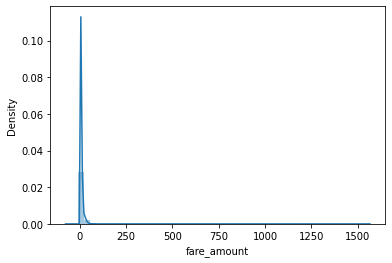

In [20]:
sns.distplot(df["fare_amount"])

<AxesSubplot:xlabel='fare_amount', ylabel='Count'>

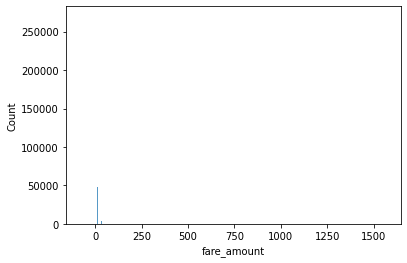

In [21]:
sns.histplot(df["fare_amount"])

In [31]:
sns.set(rc={"figure.figsize":(10, 15)})

<AxesSubplot:ylabel='fare_amount'>

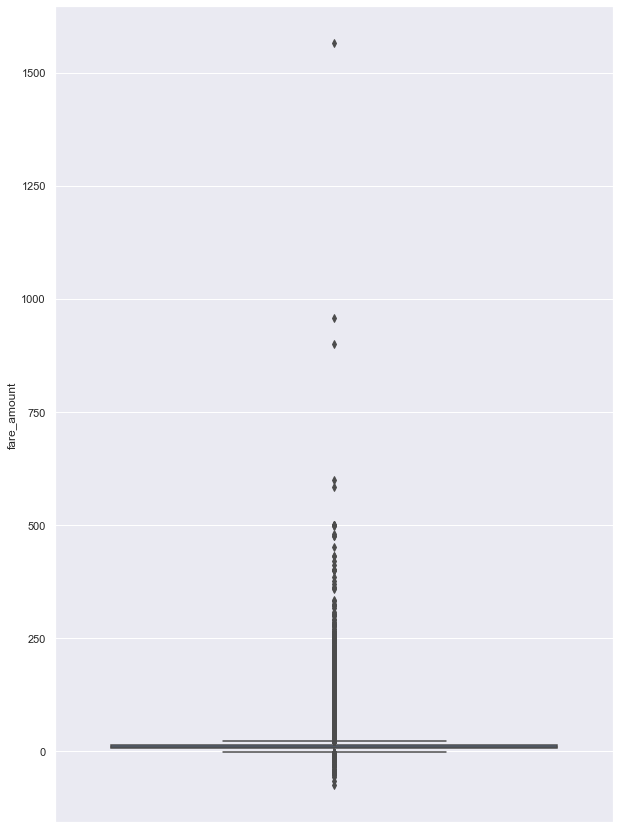

In [32]:
sns.boxplot(data = df, y = df["fare_amount"])

In [33]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,5.542386e+06,5.542386e+06,5.542386e+06,5.542341e+06,5.542341e+06,5.542386e+06
mean,1.134414e+01,-7.250868e+01,3.992286e+01,-7.250849e+01,3.991898e+01,1.685897e+00
std,9.833287e+00,1.213387e+01,9.009695e+00,1.246045e+01,9.449938e+00,1.335350e+00
min,-7.500000e+01,-3.348349e+03,-3.114112e+03,-3.394483e+03,-3.547887e+03,0.000000e+00
25%,6.000000e+00,-7.399206e+01,4.073493e+01,-7.399140e+01,4.073403e+01,1.000000e+00
50%,8.500000e+00,-7.398181e+01,4.075264e+01,-7.398015e+01,4.075317e+01,1.000000e+00
75%,1.250000e+01,-7.396708e+01,4.076711e+01,-7.396368e+01,4.076810e+01,2.000000e+00
max,1.564500e+03,2.815895e+03,3.333270e+03,3.440830e+03,3.407391e+03,2.080000e+02


In [34]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(df, test_size=0.2, random_state=10)

In [35]:
len(train_df), len(val_df)

(4433908, 1108478)

In [41]:
train_df.isna().sum(), val_df.isna().sum()

(key                  0
 fare_amount          0
 pickup_datetime      0
 pickup_longitude     0
 pickup_latitude      0
 dropoff_longitude    0
 dropoff_latitude     0
 passenger_count      0
 dtype: int64,
 key                  0
 fare_amount          0
 pickup_datetime      0
 pickup_longitude     0
 pickup_latitude      0
 dropoff_longitude    0
 dropoff_latitude     0
 passenger_count      0
 dtype: int64)

In [40]:
train_df, val_df = train_df.dropna(), val_df.dropna()

## Modelling

In [42]:
train_df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
4377063,2011-11-10 15:14:44.0000002,4.50,2011-11-10 15:14:44 UTC,-73.990273,40.743722,-73.989220,40.747921,1
549585,2013-03-14 08:54:23.0000005,8.00,2013-03-14 08:54:23 UTC,-73.983005,40.742083,-73.973350,40.756542,1
1766883,2009-11-16 19:05:00.000000117,27.07,2009-11-16 19:05:00 UTC,-73.863730,40.770365,-73.986053,40.749965,3
1912370,2015-01-10 11:05:16.0000004,5.00,2015-01-10 11:05:16 UTC,-73.976807,40.788063,-73.981911,40.779671,6
2338823,2011-01-08 19:09:00.000000165,3.70,2011-01-08 19:09:00 UTC,0.000000,0.000000,-73.939773,40.750297,3
...,...,...,...,...,...,...,...,...
1976281,2012-11-18 01:53:00.000000159,5.50,2012-11-18 01:53:00 UTC,-74.014595,40.709847,-74.004217,40.742487,1
3251323,2012-03-30 20:23:00.000000110,8.90,2012-03-30 20:23:00 UTC,-73.990167,40.761762,-73.989987,40.750757,6
3589440,2013-04-30 16:50:00.00000048,4.00,2013-04-30 16:50:00 UTC,-73.965883,40.805427,-73.960430,40.812517,1
1929743,2009-02-06 20:15:00.000000125,12.90,2009-02-06 20:15:00 UTC,-73.951865,40.777658,-73.985247,40.731813,1


<AxesSubplot:xlabel='passenger_count', ylabel='fare_amount'>

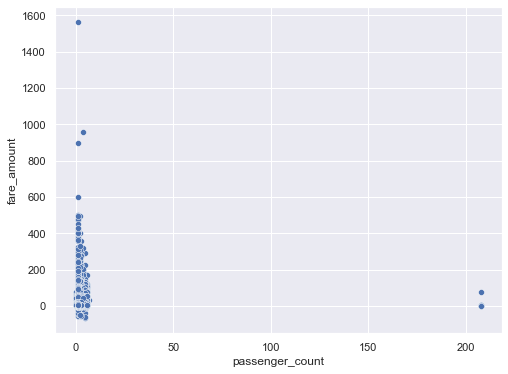

In [46]:
sns.set(rc={"figure.figsize":(8, 6)})
sns.scatterplot(y = train_df["fare_amount"], x = train_df["passenger_count"])